                                    Welcome to Machine Learning Challenge!

In [39]:
import numpy as np
import pandas as pd
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as FF
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot

In [40]:
input_path = "C:\\Users\\Varma\\ML Challenge\\data\\ml1data.train.txt"
output_path = "C:\\Users\\Varma\\ML Challenge\\data\\challengeDataset.csv"

# input_path = "/home/ankur/MachineLearning/challenge/ml-Challenge/data/ml1data.train.txt"
# output_path = "/home/ankur/MachineLearning/challenge/ml-Challenge/data/challengeDataset.csv"


In [41]:
with open('C:\\Users\\Varma\\ML Challenge\\data\\ml1data.train.txt', 'r') as original: data = original.read()
with open('C:\\Users\\Varma\\ML Challenge\\data\\ml1data.train.txt', 'w') as modified: modified.write("1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22\n" + data)
dataset = pd.read_csv(input_path)
print(dataset)

     1     2  3      4  5       6  7   8   9  10  ...   13      14  15  16  \
0    A   138  E  35.91  J    7.79  P  AA  88  AF  ...   CQ  177.27  NK  DF   
1    A   966  E  35.91  V   22.63  Q  AD  88  AF  ...   DC  171.97  NK  DF   
2    C   345  E  35.91  J   12.19  Q  AA  88  AF  ...   DC  121.70  NK  DF   
3    B   276  F  35.91  O    5.61  T  AC  44  BA  ...   CQ   60.85  NK  DG   
4    C   552  G  35.91  L   27.67  T  AB  44  AF  ...   DA   92.60  NK  DF   
5    B   161  F  35.91  J   17.17  Q  AB  44  AF  ...   CQ   92.60  NK  DF   
6    A   345  H  71.81  M    6.33  Q  AA  88  AF  ...   DC   87.31  NK  DG   
7    B   460  F  35.91  N   43.12  P  AD  22  AG  ...   CQ  158.75  NK  DF   
8    C   414  E  35.91  N   25.67  Q  AC  66  AF  ...   DC   71.44  NK  DF   
9    B  1242  H  35.91  O  106.30  Q  AE  66  AF  ...   DB  153.45  NK  DG   
10   C   483  F  35.91  O   10.48  S  AA  88  BA  ...   CQ   95.25  DE  DF   
11   B   138  F  35.91  J    3.93  Q  AE  66  BF  ...   CQ   68.

In [42]:
headers = ["X1", "X2", "X3", "X4", "X5",
               "X6", "X7", "X8", "X9", "X10",
               "X11","X12","X13","X14", "X15", "X16", "X17", "X18",
               "X19", "X20", "X21","Y"]

In [43]:
dataset.columns = headers
print(dataset)

    X1    X2 X3     X4 X5      X6 X7  X8  X9 X10  ...  X13     X14 X15  X16  \
0    A   138  E  35.91  J    7.79  P  AA  88  AF  ...   CQ  177.27  NK   DF   
1    A   966  E  35.91  V   22.63  Q  AD  88  AF  ...   DC  171.97  NK   DF   
2    C   345  E  35.91  J   12.19  Q  AA  88  AF  ...   DC  121.70  NK   DF   
3    B   276  F  35.91  O    5.61  T  AC  44  BA  ...   CQ   60.85  NK   DG   
4    C   552  G  35.91  L   27.67  T  AB  44  AF  ...   DA   92.60  NK   DF   
5    B   161  F  35.91  J   17.17  Q  AB  44  AF  ...   CQ   92.60  NK   DF   
6    A   345  H  71.81  M    6.33  Q  AA  88  AF  ...   DC   87.31  NK   DG   
7    B   460  F  35.91  N   43.12  P  AD  22  AG  ...   CQ  158.75  NK   DF   
8    C   414  E  35.91  N   25.67  Q  AC  66  AF  ...   DC   71.44  NK   DF   
9    B  1242  H  35.91  O  106.30  Q  AE  66  AF  ...   DB  153.45  NK   DG   
10   C   483  F  35.91  O   10.48  S  AA  88  BA  ...   CQ   95.25  DE   DF   
11   B   138  F  35.91  J    3.93  Q  AE  66  BF  ..

In [44]:
dataset.to_csv(output_path, index=False)
print(dataset.describe())

                X2          X4          X6          X9         X12  \
count   503.000000  503.000000  503.000000  503.000000  503.000000   
mean    474.540755   41.262883   21.780020   66.000000   45.168986   
std     283.995577   12.800034   18.918585   23.931176   17.655436   
min      92.000000   35.910000    1.670000   22.000000   16.000000   
25%     276.000000   35.910000    9.050000   44.000000   32.000000   
50%     414.000000   35.910000   15.460000   66.000000   48.000000   
75%     552.000000   35.910000   26.485000   88.000000   64.000000   
max    1380.000000   71.810000  106.300000   88.000000   64.000000   

              X14            X17         X19  
count  503.000000     503.000000  503.000000  
mean    95.042207   75055.854871   82.517256  
std     30.421495   30543.613114   25.603633  
min     52.920000   54321.000000   71.810000  
25%     71.440000   54321.000000   71.810000  
50%     89.960000   54321.000000   71.810000  
75%    109.800000  108642.000000   71.81

In [45]:
def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """

    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],
                                                        train_size=train_percentage)
    return train_x, test_x, train_y, test_y

In [46]:
print(headers[0:])

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'Y']


In [47]:
train_x, test_x, train_y, test_y = split_dataset(dataset, 0.7, headers[0:-1], headers[21])

C:\Users\Varma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [48]:
print ("Train_x Shape :: ", train_x.shape)
print(train_x)

Train_x Shape ::  (352, 21)
    X1    X2 X3     X4 X5     X6 X7  X8  X9 X10 ... X12  X13     X14  X15 X16  \
187  C   828  F  35.91  J  23.97  Q  AA  88  AF ...  32   DC   74.08   NK  DF   
332  C   552  E  35.91  J  16.16  P  AA  88  AF ...  64   DA  140.22   NK  DF   
488  A   230  E  35.91  M   6.92  Q  AC  88  AF ...  48   DA  129.64   NK  DF   
292  B   414  E  35.91  L  49.16  Q  AD  88  AF ...  64   DA  105.83   DD  DF   
241  C   345  F  35.91  J  23.79  Q  AA  88  BA ...  32   DC  142.87   DE  DG   
50   C   552  F  71.81  M  10.17  S  AC  88  BA ...  48   DC   89.96   NK  DF   
374  C   552  F  35.91  J   8.74  T  AC  88  BF ...  48   DA   68.79   NK  DF   
323  C   828  E  35.91  O  42.03  P  AA  88  AF ...  64   CQ   95.25   NK  DF   
177  C   414  F  35.91  J   9.69  Q  AE  66  BA ...  16   CQ   68.79   NK  DF   
18   A   299  E  35.91  O  11.98  Q  AE  66  AF ...  16   DA   74.08   DE  DF   
498  A   828  E  35.91  K  53.77  Q  AB  66  BA ...  32   DB   66.14   NK  DF   


In [34]:
    print ("Train_y Shape :: ", train_y.shape)
    print(train_y)
    print ("Test_x Shape :: ", test_x.shape)
    print ("Test_y Shape :: ", test_y.shape)

Train_y Shape ::  (353,)
151     MEM
389     MEM
111    NMEM
414     MEM
267     MEM
452     MEM
245     MEM
462     MEM
501     MEM
410     MEM
198     MEM
45      MEM
350    NMEM
354     MEM
67      MEM
383     MEM
237    NMEM
338     MEM
498     MEM
2       MEM
129     MEM
160     MEM
255     MEM
211    NMEM
362    NMEM
382    NMEM
263     MEM
65      MEM
51      MEM
157     MEM
       ... 
268    NMEM
423    NMEM
461    NMEM
103     MEM
487    NMEM
353     MEM
273    NMEM
490     MEM
143     MEM
438    NMEM
405    NMEM
417     MEM
259     MEM
260    NMEM
110     MEM
72      MEM
381     MEM
437     MEM
155    NMEM
373    NMEM
286     MEM
377    NMEM
165    NMEM
328    NMEM
153     MEM
348     MEM
7       MEM
449     MEM
299     MEM
215     MEM
Name: Y, Length: 353, dtype: object
Test_x Shape ::  (152, 21)
Test_y Shape ::  (152,)


In [49]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf

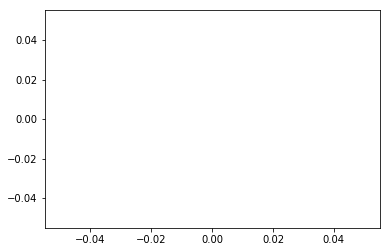

In [50]:
data = np.genfromtxt(output_path, delimiter=',', skip_header=10,
                     skip_footer=10, names=['x', 'y', 'z'])
plot.plot(data['x'], data['y'], color='r', label='the data')
plot.show()

In [51]:
#Plot CSV
df = pd.read_csv(output_path)

sample_data_table = FF.create_table(df.head())
py.iplot(sample_data_table, filename='sample-data-table')

trace1 = go.Scatter(
                    x=df['x'], y=df['logx'], # Data
                    mode='lines', name='logx' # Additional options
                   )
trace2 = go.Scatter(x=df['x'], y=df['sinx'], mode='lines', name='sinx' )
trace3 = go.Scatter(x=df['x'], y=df['cosx'], mode='lines', name='cosx')

layout = go.Layout(title='Simple Plot from csv data',
                   plot_bgcolor='rgb(230, 230,230)')

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Plot data in the notebook
py.iplot(fig, filename='simple-plot-from-csv')

KeyError: 'x'